<a href="https://colab.research.google.com/github/farahwalid/Heart-Disease-prediction-on-by-ML-echniques/blob/master/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
#importing machine learning libraries
import pickle
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report 

# for hyperparamter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.feature_selection import SelectKBest, chi2

#importing classifiers
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
# pandas profilling for fast data understanding
from pandas_profiling import ProfileReport

import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as pyplot
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive



# Reading Data

In [ ]:
heart_path="/content/drive/My Drive/GP/framingham.csv"
heart_data = pd.read_csv(heart_path)

In [ ]:
heart_data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
heart_data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


Data Cleaning
# Missing Values

In [ ]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [ ]:
heart_data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


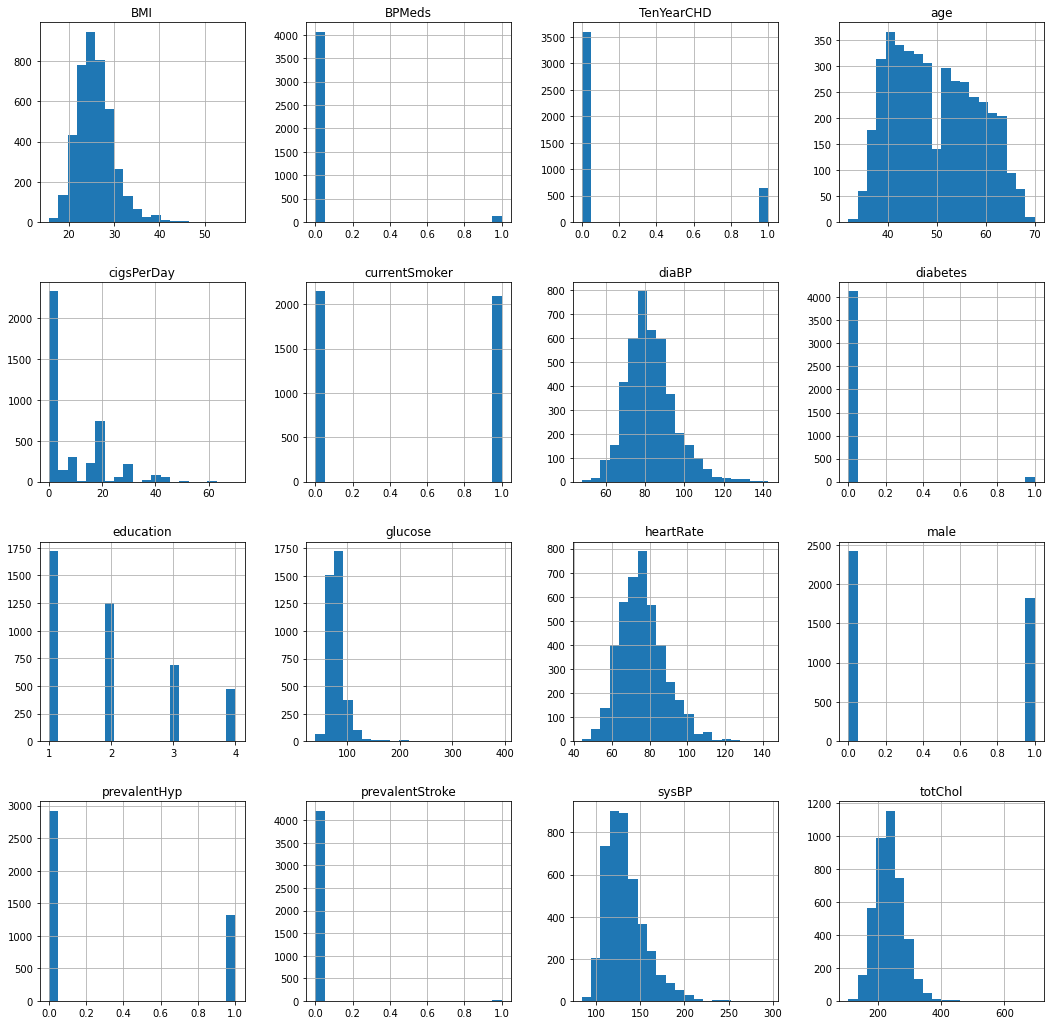

In [ ]:
fig = pyplot.figure(figsize=(18,18))
ax = fig.gca()
heart_data.hist(ax=ax,bins=20)
pyplot.show()

In [ ]:
from sklearn.impute import SimpleImputer

# Imputation
my_imputer = SimpleImputer(strategy='median')
imputed_data = pd.DataFrame(my_imputer.fit_transform(heart_data))

# Imputation removed column names; put them back
imputed_data.columns = heart_data.columns


In [ ]:
imputed_data.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [ ]:
imputed_data.drop('education', axis = 1 , inplace = True)

In [ ]:
imputed_data

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0.0
1,0.0,46.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0.0
2,1.0,48.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0,0.0
3,0.0,61.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0,1.0
4,0.0,46.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1.0,50.0,1.0,1.0,0.0,0.0,1.0,0.0,313.0,179.0,92.0,25.97,66.0,86.0,1.0
4234,1.0,51.0,1.0,43.0,0.0,0.0,0.0,0.0,207.0,126.5,80.0,19.71,65.0,68.0,0.0
4235,0.0,48.0,1.0,20.0,0.0,0.0,0.0,0.0,248.0,131.0,72.0,22.00,84.0,86.0,0.0
4236,0.0,44.0,1.0,15.0,0.0,0.0,0.0,0.0,210.0,126.5,87.0,19.16,86.0,78.0,0.0


# Cleaning(Outliers)

count    4238.000000
mean      236.689476
std        44.327427
min       107.000000
25%       206.000000
50%       234.000000
75%       262.000000
max       696.000000
Name: totChol, dtype: float64


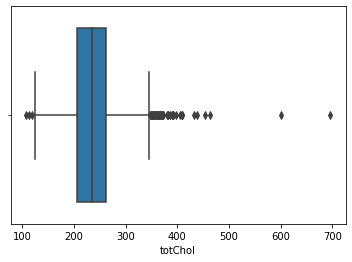

In [ ]:
print(imputed_data.totChol.describe())
sns.boxplot(imputed_data.totChol)

In [ ]:
len(imputed_data[imputed_data.totChol >320 ])

158

In [ ]:
imputed_data = imputed_data[imputed_data.totChol <400 ]

In [ ]:
len(imputed_data[imputed_data.totChol >320 ])

148

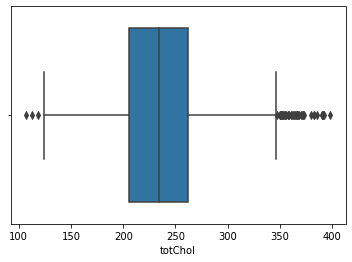

In [ ]:
sns.boxplot(imputed_data.totChol)

count    4228.000000
mean      132.323675
std        22.031234
min        83.500000
25%       117.000000
50%       128.000000
75%       143.500000
max       295.000000
Name: sysBP, dtype: float64


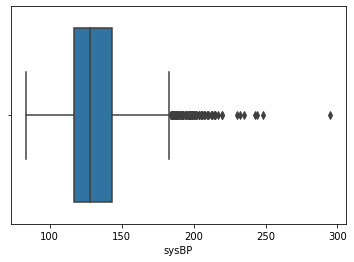

In [ ]:

print(imputed_data.sysBP.describe())
sns.boxplot(imputed_data.sysBP)

In [ ]:
imputed_data= imputed_data[imputed_data.sysBP<200]

In [ ]:
len(imputed_data[imputed_data.sysBP>200])

0

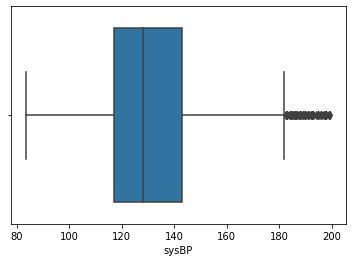

In [ ]:
sns.boxplot(imputed_data.sysBP)

count    4184.000000
mean       75.777008
std        11.962298
min        44.000000
25%        68.000000
50%        75.000000
75%        82.000000
max       143.000000
Name: heartRate, dtype: float64


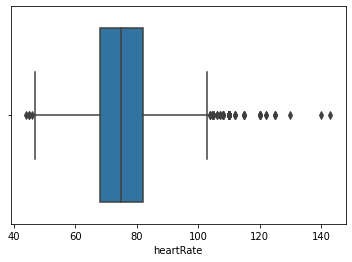

In [ ]:

print(imputed_data.heartRate.describe())
sns.boxplot(imputed_data.heartRate)


In [ ]:
len(imputed_data[imputed_data.heartRate >100])

101

In [ ]:
imputed_data= imputed_data[imputed_data.heartRate<100]

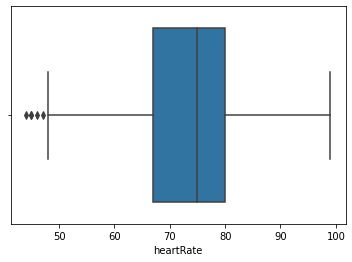

In [ ]:
sns.boxplot(imputed_data.heartRate)


In [ ]:
heart_data.to_csv('heart_data.csv')

# Models

Data Splitting

In [ ]:
#split the data after adding the new features
X , X_te, y, y_te = train_test_split(imputed_data.drop('TenYearCHD',axis = 1), imputed_data.TenYearCHD, train_size = 0.8 , random_state = 1)

Decision Tree

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X,y)

#Predict the response for test dataset
y_pred = clf.predict(X_te)

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(y_te, y_pred))

Accuracy: 0.7593984962406015


In [ ]:
# Create Decision Tree classifer object
clf2 = DecisionTreeClassifier(max_depth=3)

# Train Decision Tree Classifer
clf2 = clf2.fit(X,y)

#Predict the response for test dataset
y_prede = clf2.predict(X_te)

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(y_te, y_prede))

Accuracy: 0.8646616541353384


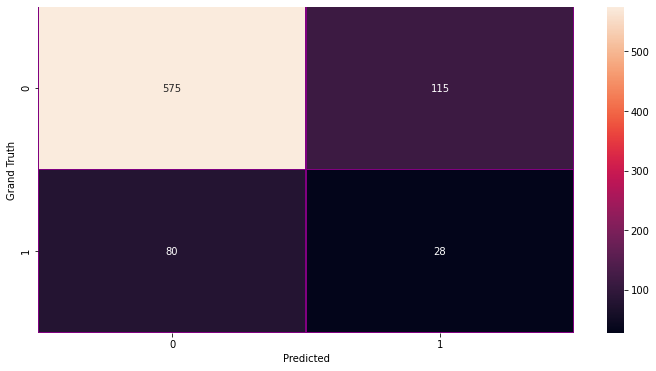

Report 

               precision    recall  f1-score   support

         0.0       0.88      0.83      0.86       690
         1.0       0.20      0.26      0.22       108

    accuracy                           0.76       798
   macro avg       0.54      0.55      0.54       798
weighted avg       0.79      0.76      0.77       798



In [ ]:
cmmm = confusion_matrix(y_te , y_pred)
f, ax = pyplot.subplots(figsize=(12,6))
sns.heatmap(cmmm,fmt=".0f", annot=True,linewidths=0.2, linecolor="purple", ax=ax)
pyplot.xlabel("Predicted")
pyplot.ylabel("Grand Truth")
pyplot.show()

print('Report \n\n' , classification_report(y_te, y_pred) )

Random forest

In [ ]:
rf_ = RandomForestClassifier()

# fit your model
rf_.fit(X, y)
predictions = rf_.predict(X_te)
# Calculate the mean absolute error of your Random Forest model on the validation data
rf_val_acc = accuracy_score(y_te, predictions)

print("Validation Accuracy for Random Forest Model: {}".format(rf_val_acc))

Validation Accuracy for Random Forest Model: 0.8659147869674185


In [ ]:
from IPython.display import Image  
from sklearn import tree
import pydotplus

In [ ]:
tree_count = 0
for tree_in_random_forest in rf_.estimators_:
    if (tree_count ==1):        
        rfr_file = tree.export_graphviz(tree_in_random_forest, out_file=None)
        rfr_graph = pydotplus.graph_from_dot_data(rfr_file)        
    tree_count = tree_count + 1
Image(rfr_graph.create_png())

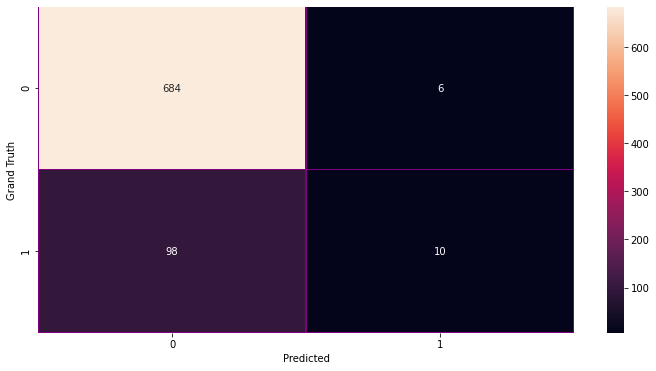

Report 

               precision    recall  f1-score   support

         0.0       0.87      0.99      0.93       690
         1.0       0.62      0.09      0.16       108

    accuracy                           0.87       798
   macro avg       0.75      0.54      0.55       798
weighted avg       0.84      0.87      0.83       798



In [ ]:
cmm = confusion_matrix(y_te , predictions)
f, ax = pyplot.subplots(figsize=(12,6))
sns.heatmap(cmm,fmt=".0f", annot=True,linewidths=0.2, linecolor="purple", ax=ax)
pyplot.xlabel("Predicted")
pyplot.ylabel("Grand Truth")
pyplot.show()

print('Report \n\n' , classification_report(y_te, predictions) )

KNN

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

X = scaler.transform(X)
X_te = scaler.transform(X_te)

In [ ]:
classifier = KNeighborsClassifier(n_neighbors = 3)
classifier.fit(X, y)
y_pred = classifier.predict(X_te)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_te, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_te, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_te,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[659  31]
 [ 91  17]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92       690
         1.0       0.35      0.16      0.22       108

    accuracy                           0.85       798
   macro avg       0.62      0.56      0.57       798
weighted avg       0.81      0.85      0.82       798

Accuracy: 0.8471177944862155


# Data Exploration


In [ ]:
class_1 = imputed_data[imputed_data.TenYearCHD == 1]

In [ ]:
class_1.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3,0.0,61.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0,1.0
6,0.0,63.0,0.0,0.0,0.0,0.0,0.0,0.0,205.0,138.0,71.0,33.11,60.0,85.0,1.0
15,0.0,38.0,1.0,20.0,0.0,0.0,1.0,0.0,221.0,140.0,90.0,21.35,95.0,70.0,1.0
17,0.0,46.0,1.0,20.0,0.0,0.0,0.0,0.0,291.0,112.0,78.0,23.38,80.0,89.0,1.0
25,1.0,47.0,1.0,20.0,0.0,0.0,0.0,0.0,294.0,102.0,68.0,24.18,62.0,66.0,1.0


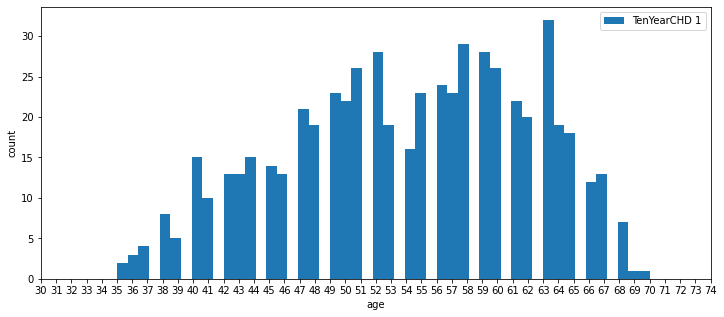

In [ ]:
pyplot.figure(figsize=[12,5])
pyplot.hist(class_1['age'], 50, align='mid', label='TenYearCHD 1')
pyplot.xlabel('age')
pyplot.ylabel('count')
pyplot.legend()
pyplot.xticks(np.arange(30,75,1))
pyplot.show()

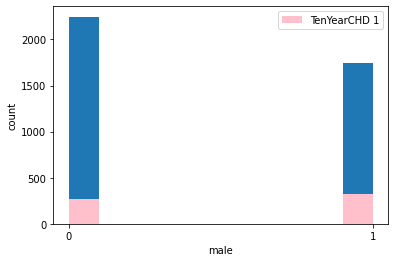

In [ ]:
pyplot.hist(imputed_data['male'], align='mid',stacked=True)
pyplot.hist(imputed_data[imputed_data.TenYearCHD == 1].male, color="pink", label='TenYearCHD 1')
pyplot.xlabel('male')
pyplot.ylabel('count')
pyplot.legend()
pyplot.xticks(np.arange(0,2,1))
pyplot.show()

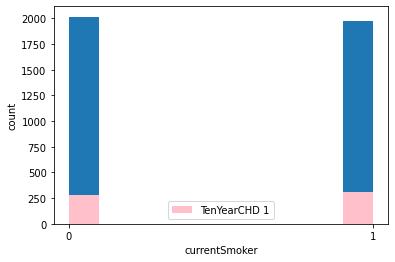

In [ ]:
pyplot.hist(imputed_data['currentSmoker'], align='mid',stacked=True)
pyplot.hist(imputed_data[imputed_data.TenYearCHD == 1].currentSmoker, color="pink", label='TenYearCHD 1')
pyplot.xlabel('currentSmoker')
pyplot.ylabel('count')
pyplot.legend()
pyplot.xticks(np.arange(0,2,1))
pyplot.show()

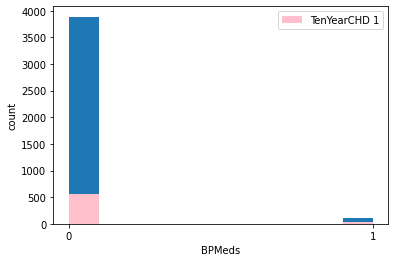

In [ ]:
pyplot.hist(imputed_data['BPMeds'], align='mid',stacked=True)
pyplot.hist(imputed_data[imputed_data.TenYearCHD == 1].BPMeds, color="pink", label='TenYearCHD 1')
pyplot.xlabel('BPMeds')
pyplot.ylabel('count')
pyplot.legend()
pyplot.xticks(np.arange(0,2,1))
pyplot.show()

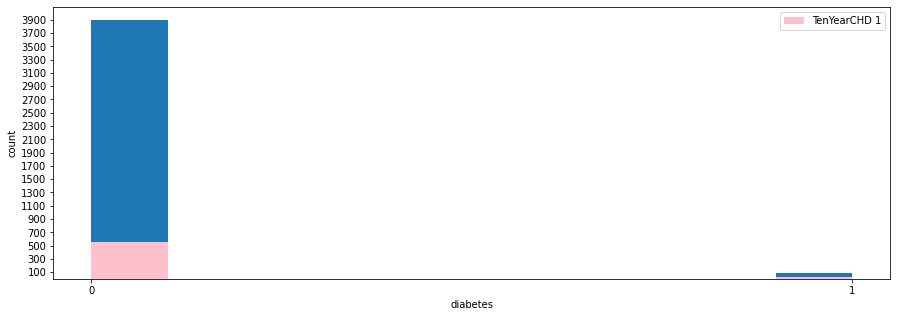

In [ ]:
pyplot.figure(figsize=[15,5])
pyplot.hist(imputed_data['diabetes'], align='mid',stacked=True)
pyplot.hist(imputed_data[imputed_data.TenYearCHD == 1].diabetes, color="pink", label='TenYearCHD 1')
pyplot.xlabel('diabetes')
pyplot.ylabel('count')
pyplot.legend()
pyplot.xticks(np.arange(0,2,1))
pyplot.yticks(np.arange(100,4000,200))
pyplot.show()

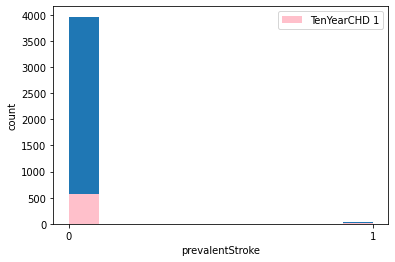

In [ ]:
pyplot.hist(imputed_data['prevalentStroke'], align='mid',stacked=True)
pyplot.hist(imputed_data[imputed_data.TenYearCHD == 1].prevalentStroke, color="pink", label='TenYearCHD 1')
pyplot.xlabel('prevalentStroke')
pyplot.ylabel('count')
pyplot.legend()
pyplot.xticks(np.arange(0,2,1))
pyplot.show()

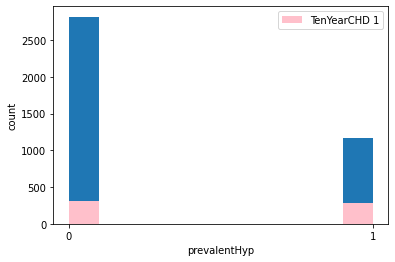

In [ ]:
pyplot.hist(imputed_data['prevalentHyp'], align='mid',stacked=True)
pyplot.hist(imputed_data[imputed_data.TenYearCHD == 1].prevalentHyp, color="pink", label='TenYearCHD 1')
pyplot.xlabel('prevalentHyp')
pyplot.ylabel('count')
pyplot.legend()
pyplot.xticks(np.arange(0,2,1))
pyplot.show()

In [ ]:
imputed_data.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0.0
1,0.0,46.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0.0
2,1.0,48.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0,0.0
3,0.0,61.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0,1.0
4,0.0,46.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0,0.0


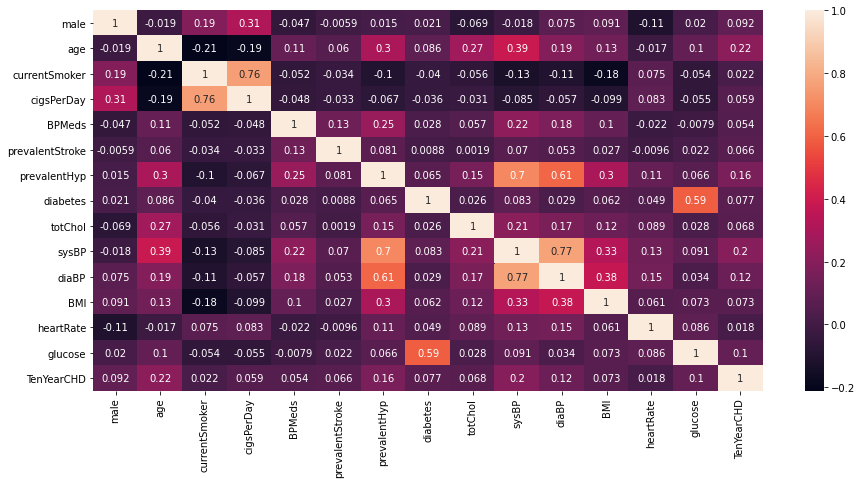

In [ ]:
pyplot.figure(figsize=[15,7])

corr = imputed_data.corr()

# plot the heatmap

sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, annot=True)

In [ ]:
imputed_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3990 entries, 0 to 4237
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             3990 non-null   float64
 1   age              3990 non-null   float64
 2   currentSmoker    3990 non-null   float64
 3   cigsPerDay       3990 non-null   float64
 4   BPMeds           3990 non-null   float64
 5   prevalentStroke  3990 non-null   float64
 6   prevalentHyp     3990 non-null   float64
 7   diabetes         3990 non-null   float64
 8   totChol          3990 non-null   float64
 9   sysBP            3990 non-null   float64
 10  diaBP            3990 non-null   float64
 11  BMI              3990 non-null   float64
 12  heartRate        3990 non-null   float64
 13  glucose          3990 non-null   float64
 14  TenYearCHD       3990 non-null   float64
dtypes: float64(15)
memory usage: 498.8 KB


# Feature Generation

In [ ]:
import itertools
cat_features = ['male','prevalentStroke' ,'prevalentHyp','diabetes','BPMeds']
# Iterate through each pair of 2 features, combine them into interaction features
all_combinations = list(itertools.combinations(cat_features, 2))
for combination in all_combinations: #for each pair of columns convert them to strings then join them with the + operator.
  interaction = imputed_data[combination[0]].map(str) + '_' + imputed_data[combination[1]].map(str)
  interaction_name = combination[0] + '_' + combination[1]
  imputed_data[interaction_name] = interaction
imputed_data
    


,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,male_prevalentStroke,male_prevalentHyp,male_diabetes,male_BPMeds,prevalentStroke_prevalentHyp,prevalentStroke_diabetes,prevalentStroke_BPMeds,prevalentHyp_diabetes,prevalentHyp_BPMeds,diabetes_BPMeds
0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0.0,1.0_0.0,1.0_0.0,1.0_0.0,1.0_0.0,0.0_0.0,0.0_0.0,0.0_0.0,0.0_0.0,0.0_0.0,0.0_0.0
1,0.0,46.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0.0,0.0_0.0,0.0_0.0,0.0_0.0,0.0_0.0,0.0_0.0,0.0_0.0,0.0_0.0,0.0_0.0,0.0_0.0,0.0_0.0
2,1.0,48.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0,0.0,1.0_0.0,1.0_0.0,1.0_0.0,1.0_0.0,0.0_0.0,0.0_0.0,0.0_0.0,0.0_0.0,0.0_0.0,0.0_0.0
3,0.0,61.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0,1.0,0.0_0.0,0.0_1.0,0.0_0.0,0.0_0.0,0.0_1.0,0.0_0.0,0.0_0.0,1.0_0.0,1.0_0.0,0.0_0.0
4,0.0,46.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0,0.0,0.0_0.0,0.0_0.0,0.0_0.0,0.0_0.0,0.0_0.0,0.0_0.0,0.0_0.0,0.0_0.0,0.0_0.0,0.0_0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1.0,50.0,1.0,1.0,0.0,0.0,1.0,0.0,313.0,179.0,92.0,25.97,66.0,86.0,1.0,1.0_0.0,1.0_1.0,1.0_0.0,1.0_0.0,0.0_1.0,0.0_0.0,0.0_0.0,1.0_0.0,1.0_0.0,0.0_0.0
4234,1.0,51.0,1.0,43.0,0.0,0.0,0.0,0.0,207.0,126.5,80.0,19.71,65.0,68.0,0.0,1.0_0.0,1.0_0.0,1.0_0.0,1.0_0.0,0.0_0.0,0.0_0.0,0.0_0.0,0.0_0.0,0.0_0.0,0.0_0.0
4235,0.0,48.0,1.0,20.0,0.0,0.0,0.0,0.0,248.0,131.0,72.0,22.00,84.0,86.0,0.0,0.0_0.0,0.0_0.0,0.0_0.0,0.0_0.0,0.0_0.0,0.0_0.0,0.0_0.0,0.0_0.0,0.0_0.0,0.0_0.0
4236,0.0,44.0,1.0,15.0,0.0,0.0,0.0,0.0,210.0,126.5,87.0,19.16,86.0,78.0,0.0,0.0_0.0,0.0_0.0,0.0_0.0,0.0_0.0,0.0_0.0,0.0_0.0,0.0_0.0,0.0_0.0,0.0_0.0,0.0_0.0


In [ ]:
imputed_data.info


<bound method DataFrame.info of       male   age  ...  prevalentHyp_BPMeds  diabetes_BPMeds
0      1.0  39.0  ...              0.0_0.0          0.0_0.0
1      0.0  46.0  ...              0.0_0.0          0.0_0.0
2      1.0  48.0  ...              0.0_0.0          0.0_0.0
3      0.0  61.0  ...              1.0_0.0          0.0_0.0
4      0.0  46.0  ...              0.0_0.0          0.0_0.0
...    ...   ...  ...                  ...              ...
4233   1.0  50.0  ...              1.0_0.0          0.0_0.0
4234   1.0  51.0  ...              0.0_0.0          0.0_0.0
4235   0.0  48.0  ...              0.0_0.0          0.0_0.0
4236   0.0  44.0  ...              0.0_0.0          0.0_0.0
4237   0.0  52.0  ...              0.0_0.0          0.0_0.0

[3990 rows x 25 columns]>

# One-Hot Encoding

In [ ]:
#split the data after adding the new features
X_train , X_test, y_train, y_test = train_test_split(imputed_data.drop('TenYearCHD',axis = 1), imputed_data.TenYearCHD, train_size = 0.8 , random_state = 1)

In [ ]:
cat_cols = list(X_train.select_dtypes(include = ['object']).columns) # getting the index of the categorical variables

OH_cols_train = pd.get_dummies(X_train[cat_cols]) 
OH_cols_test =  pd.get_dummies(X_test[cat_cols]) 

numerical_train = X_train.drop(cat_cols , axis = 1) # drop the categorical variables
numerical_test = X_test.drop(cat_cols , axis = 1) # drop the categorical variables

X_train = pd.concat([numerical_train , OH_cols_train], axis = 1 ) # add the new one hot encoded variables
X_test = pd.concat([numerical_test , OH_cols_test] , axis = 1) # add the new one hot encoded variables

In [ ]:
X_test.head()


,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,male_prevalentStroke_0.0_0.0,male_prevalentStroke_1.0_0.0,male_prevalentStroke_1.0_1.0,male_prevalentHyp_0.0_0.0,male_prevalentHyp_0.0_1.0,male_prevalentHyp_1.0_0.0,male_prevalentHyp_1.0_1.0,male_diabetes_0.0_0.0,male_diabetes_0.0_1.0,male_diabetes_1.0_0.0,male_diabetes_1.0_1.0,male_BPMeds_0.0_0.0,male_BPMeds_0.0_1.0,male_BPMeds_1.0_0.0,male_BPMeds_1.0_1.0,prevalentStroke_prevalentHyp_0.0_0.0,prevalentStroke_prevalentHyp_0.0_1.0,prevalentStroke_prevalentHyp_1.0_0.0,prevalentStroke_prevalentHyp_1.0_1.0,prevalentStroke_diabetes_0.0_0.0,prevalentStroke_diabetes_0.0_1.0,prevalentStroke_diabetes_1.0_0.0,prevalentStroke_BPMeds_0.0_0.0,prevalentStroke_BPMeds_0.0_1.0,prevalentStroke_BPMeds_1.0_0.0,prevalentHyp_diabetes_0.0_0.0,prevalentHyp_diabetes_0.0_1.0,prevalentHyp_diabetes_1.0_0.0,prevalentHyp_diabetes_1.0_1.0,prevalentHyp_BPMeds_0.0_0.0,prevalentHyp_BPMeds_1.0_0.0,prevalentHyp_BPMeds_1.0_1.0,diabetes_BPMeds_0.0_0.0,diabetes_BPMeds_0.0_1.0,diabetes_BPMeds_1.0_0.0,diabetes_BPMeds_1.0_1.0
3342,0.0,63.0,0.0,0.0,0.0,0.0,0.0,0.0,297.0,133.5,92.0,25.09,80.0,74.0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0
3692,1.0,50.0,0.0,0.0,0.0,0.0,1.0,0.0,252.0,114.0,75.0,30.89,60.0,69.0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0
988,1.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,266.0,139.0,88.0,23.61,75.0,78.0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0
4129,1.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,176.0,147.5,87.5,24.15,85.0,100.0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0
169,0.0,46.0,1.0,20.0,0.0,0.0,1.0,0.0,197.0,144.0,78.0,22.51,72.0,60.0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0


import shap
explainer = shap.TreeExplainer(rm)
shap_values = explainer.shap_values(X_train)import shap
explainer = shap.TreeExplainer(rm)
shap_values = explainer.shap_values(X_train)import shap
explainer = shap.TreeExplainer(rm)
shap_values = explainer.shap_values(X_train)import shap
explainer = shap.TreeExplainer(rm)
shap_values = explainer.shap_values(X_train)import shap
explainer = shap.TreeExplainer(rm)
shap_values = explainer.shap_values(X_train)import shap
explainer = shap.TreeExplainer(rm)
shap_values = explainer.shap_values(X_train)import shap
explainer = shap.TreeExplainer(rm)
shap_values = explainer.shap_values(X_train)import shap
explainer = shap.TreeExplainer(rm)
shap_values = explainer.shap_values(X_train) # Create object that can calculate shap values
import shap
explainer = shap.TreeExplainer(rm)
shap_values = explainer.shap_values(X_train) # Create object that can calculate shap values
import shap
explainer = shap.TreeExplainer(rm)
shap_values = explainer.shap_values(X_train) # Create object that can calculate shap values
import shap
explainer = shap.TreeExplainer(rm)
shap_values = explainer.shap_values(X_train) # Create object that can calculate shap values
import shap
explainer = shap.TreeExplainer(rm)
shap_values = explainer.shap_values(X_train) # Create object that can calculate shap values
import shap
explainer = shap.TreeExplainer(rm)
shap_values = explainer.shap_values(X_train) # Create object that can calculate shap values
import shap
explainer = shap.TreeExplainer(rm)
shap_values = explainer.shap_values(X_train) # Create object that can calculate shap values
# Feature Selection

In [ ]:
set(X_train.columns) - set(X_test.columns)

{'male_prevalentStroke_0.0_1.0',
 'prevalentStroke_BPMeds_1.0_1.0',
 'prevalentStroke_diabetes_1.0_1.0'}

In [ ]:
X_train.drop('male_prevalentStroke_0.0_1.0', axis = 1 , inplace = True)
X_train.drop('prevalentStroke_BPMeds_1.0_1.0', axis = 1 , inplace = True)
X_train.drop('prevalentStroke_diabetes_1.0_1.0', axis = 1 , inplace = True)


In [ ]:
xgb = XGBClassifier(n_jobs = -1 ,random_state=1  )
xgb.fit(X_train , y_train  )
preds = xgb.predict(X_test)
print("XGB accuracy is : " , " " , accuracy_score(preds , y_test) )



XGB accuracy is :    0.8659147869674185


In [ ]:
sorted(list(xgb.feature_importances_) , reverse=True) 

[0.13600525,
 0.09534194,
 0.086919986,
 0.066954814,
 0.050792273,
 0.047823068,
 0.047193952,
 0.046863154,
 0.046831295,
 0.046428703,
 0.040864833,
 0.038082577,
 0.03572544,
 0.03278085,
 0.032306395,
 0.028563123,
 0.026666926,
 0.024350993,
 0.024311341,
 0.024247859,
 0.02094522,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [ ]:
results=pd.DataFrame()
results['columns']=X_train.columns
results['importances'] = xgb.feature_importances_
results.sort_values(by='importances',ascending=False,inplace=True)
results.head(70)

,columns,importances
17,male_prevalentHyp_0.0_0.0,0.136005
1,age,0.095342
20,male_prevalentHyp_1.0_1.0,0.086920
14,male_prevalentStroke_0.0_0.0,0.066955
25,male_BPMeds_0.0_0.0,0.050792
9,sysBP,0.047823
39,prevalentHyp_diabetes_0.0_0.0,0.047194
36,prevalentStroke_BPMeds_0.0_0.0,0.046863
3,cigsPerDay,0.046831
6,prevalentHyp,0.046429


In [ ]:
results = results[results.importances > 0]
selected_cols = list(results['columns'].values)
Final_X_train = X_train[selected_cols]
Final_X_test = X_test[selected_cols]

In [ ]:
Final_X_train.info

<bound method DataFrame.info of       male_prevalentHyp_0.0_0.0  ...  diabetes_BPMeds_1.0_0.0
782                           0  ...                        0
3441                          1  ...                        0
3566                          1  ...                        0
2866                          0  ...                        0
2566                          0  ...                        0
...                         ...  ...                      ...
4083                          1  ...                        0
1160                          1  ...                        0
4228                          0  ...                        1
248                           0  ...                        0
1125                          0  ...                        0

[3192 rows x 21 columns]>

In [ ]:
Final_X_train.columns

Index(['male_prevalentHyp_0.0_0.0', 'age', 'male_prevalentHyp_1.0_1.0',
       'male_prevalentStroke_0.0_0.0', 'male_BPMeds_0.0_0.0', 'sysBP',
       'prevalentHyp_diabetes_0.0_0.0', 'prevalentStroke_BPMeds_0.0_0.0',
       'cigsPerDay', 'prevalentHyp', 'glucose', 'diaBP',
       'prevalentStroke_BPMeds_1.0_0.0', 'BMI', 'male_diabetes_1.0_0.0',
       'totChol', 'heartRate', 'male_diabetes_1.0_1.0', 'male',
       'prevalentStroke_BPMeds_0.0_1.0', 'diabetes_BPMeds_1.0_0.0'],
      dtype='object')

In [ ]:
xgb = XGBClassifier(n_jobs = -1 ,random_state=1  )
xgb.fit(Final_X_train , y_train  )
preds = xgb.predict(Final_X_test)
print("XGB accuracy is : " , " " , accuracy_score(preds , y_test) )

XGB accuracy is :    0.8659147869674185


# Hyperparameter tuning

In [ ]:
rf_model = RandomForestClassifier()

# fit your model
rf_model.fit(Final_X_train, y_train)
predictions = rf_model.predict(Final_X_test)
# Calculate the mean absolute error of your Random Forest model on the validation data
rf_val_acc = accuracy_score(y_test, predictions)

print("Validation Accuracy for Random Forest Model: {}".format(rf_val_acc))


Validation Accuracy for Random Forest Model: 0.8721804511278195


In [ ]:
from pprint import pprint

from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 35, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [5, 12, 20, 27, 35, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [50, 66, 83, 100, 116, 133, 150, 166, 183, 200]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=1, n_jobs = -1)
# Fit the random search model
rf_random.fit(Final_X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   57.1s
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  3.0min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
rf_random.best_params_



{'bootstrap': False,
 'max_depth': 12,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 116}

In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    print('Model Performance')
    print('Accuracy = {:0.2f}%.'.format(accuracy_score(y_test, predictions)*100))
    return accuracy_score(y_test, predictions)
base_model = RandomForestClassifier(random_state = 1)
base_model.fit(Final_X_train, y_train)
base_accuracy = evaluate(base_model, Final_X_test, y_test)


Model Performance
Accuracy = 86.84%.


In [ ]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, Final_X_test, y_test)


Model Performance
Accuracy = 86.84%.


In [ ]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))


Improvement of 0.29%.


In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [10,12,14,16, None],
    'max_features': ['sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [150, 180, 200, 220, 300]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)



grid_search.fit(Final_X_train, y_train)

Fitting 5 folds for each of 225 candidates, totalling 1125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   19.7s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  6.1min


KeyboardInterrupt: ignored

In [ ]:
grid_search.best_params_


In [ ]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, Final_X_test, y_test)


In [ ]:
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))


In [ ]:

Final_model = RandomForestClassifier(n_estimators = 200, random_state = 1, max_depth=12, max_features='sqrt', min_samples_leaf=2, min_samples_split=10, bootstrap=True)
Final_model.fit(Final_X_train, y_train)
Final_accuracy = evaluate(Final_model, Final_X_test, y_test)




Model Performance
Accuracy = 86.84%.


In [ ]:
predictions = Final_model.predict(Final_X_test)
acc = accuracy_score(y_test, predictions)
print(acc)

0.868421052631579


In [ ]:
######Final Model###########
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, Final_X_test, y_test)

Model Performance
Accuracy = 86.84%.


# Model Explainability

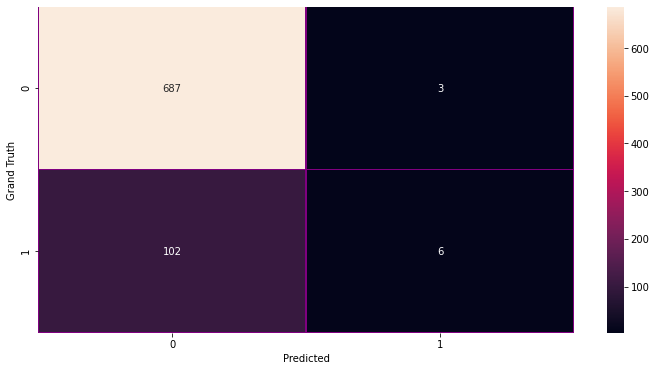

Report 

               precision    recall  f1-score   support

         0.0       0.87      1.00      0.93       690
         1.0       0.67      0.06      0.10       108

    accuracy                           0.87       798
   macro avg       0.77      0.53      0.52       798
weighted avg       0.84      0.87      0.82       798



In [ ]:
cm = confusion_matrix(y_test , predictions)
f, ax = pyplot.subplots(figsize=(12,6))
sns.heatmap(cm,fmt=".0f", annot=True,linewidths=0.2, linecolor="purple", ax=ax)
pyplot.xlabel("Predicted")
pyplot.ylabel("Grand Truth")
pyplot.show()

print('Report \n\n' , classification_report(y_test, predictions) )

In [ ]:
!pip install shap

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


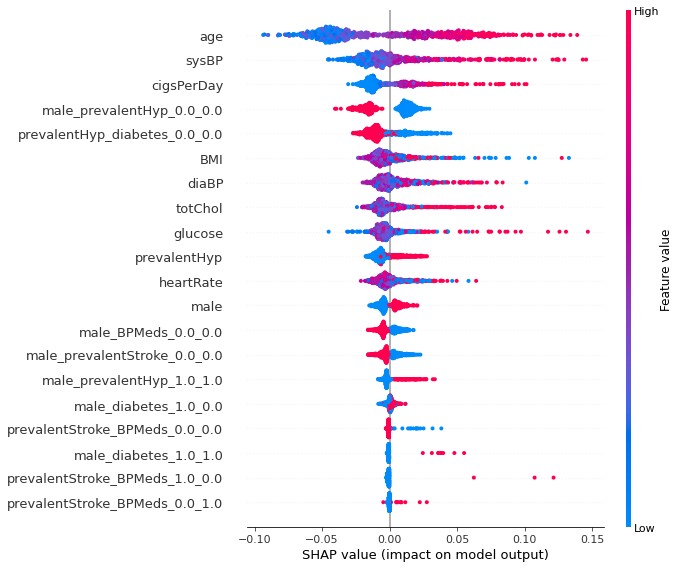

In [ ]:
############ drop education ####################
import shap
explainer = shap.TreeExplainer(Final_model)
shap_values = explainer.shap_values(Final_X_test) # Create object that can calculate shap values
shap.summary_plot(shap_values[1], Final_X_test) # get the values for class 1

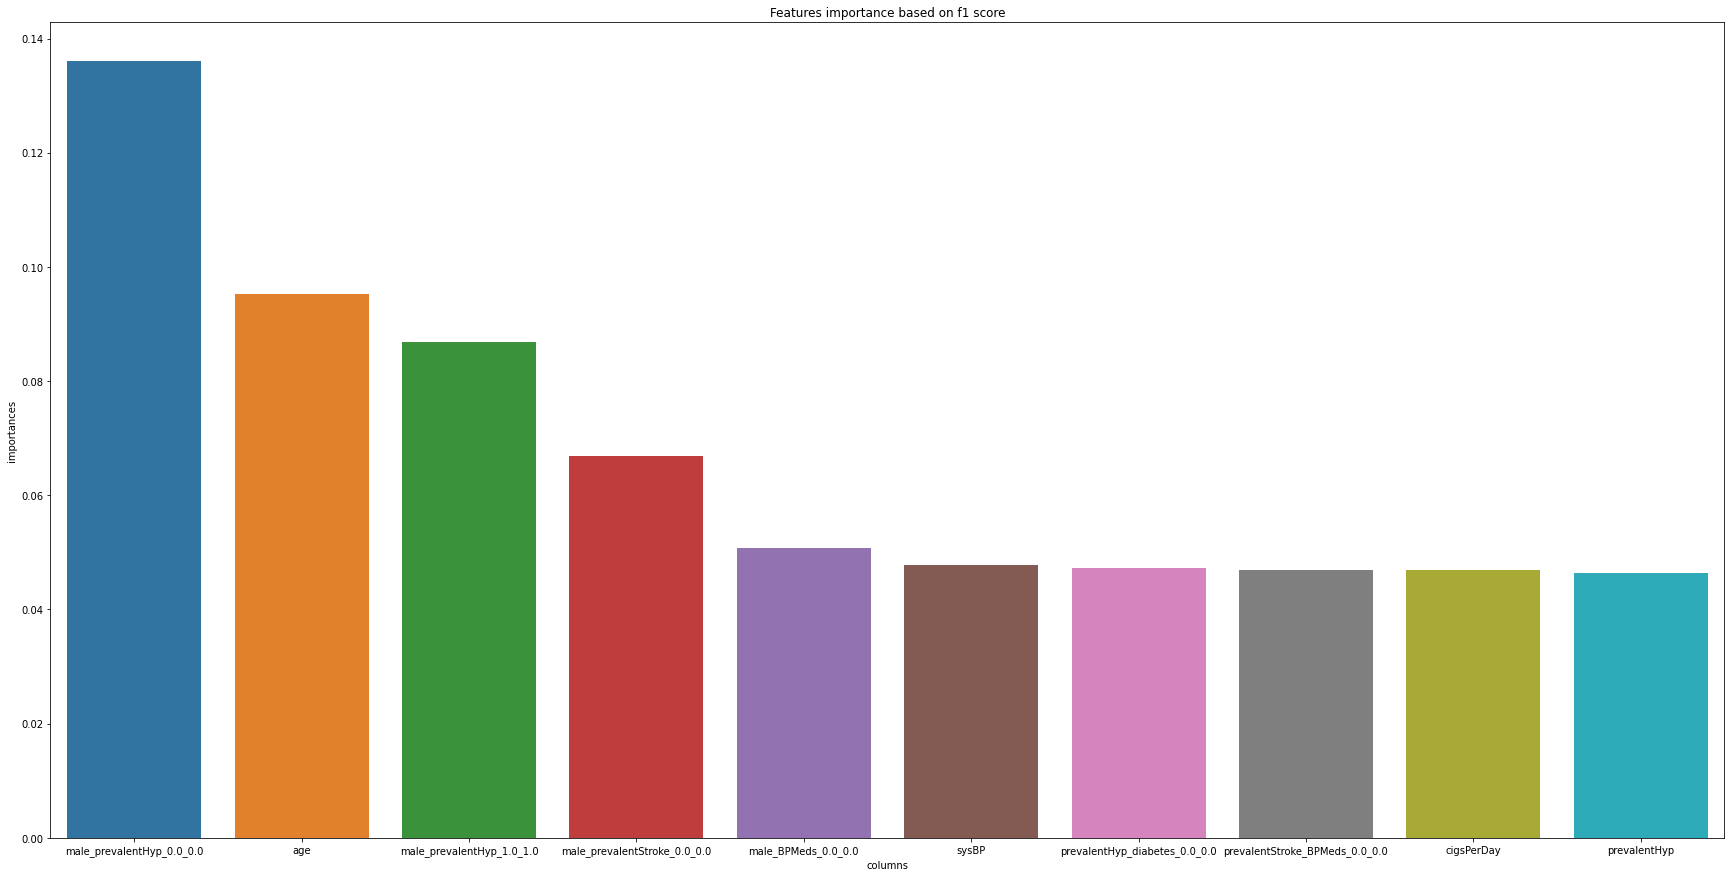

In [ ]:
pyplot.figure(figsize=(30,15))
pyplot.title("Features importance based on f1 score")
pyplot.xlabel("features")
pyplot.ylabel("importance")
sns.barplot(x = results[:10]['columns'] , y = results[:10]['importances'] )

# Decision Tree

In [ ]:
#ask bashmohndes
# List of values to try for max_depth:
max_depth_range = list(range(1, 6))
# List to store the average RMSE for each value of max_depth:
accuracy = []
for depth in max_depth_range:
    clf = DecisionTreeClassifier(max_depth = depth, random_state = 1)
    clf.fit(Final_X_train, y_train)
    score = clf.score(Final_X_test, y_test)
    accuracy.append(score)
print(accuracy)

In [ ]:
# Create Decision Tree classifer object
clf_final = DecisionTreeClassifier(max_depth=2)

# Train Decision Tree Classifer
clf_final = clf_final.fit(Final_X_train,y_train)

#Predict the response for test dataset
y_p = clf_final.predict(Final_X_test)

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_p))

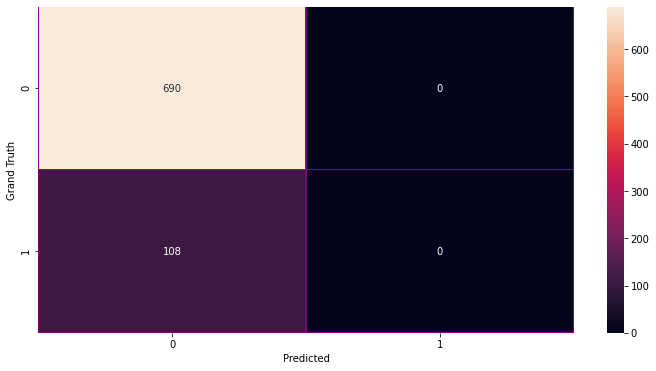

Report 

               precision    recall  f1-score   support

         0.0       0.86      1.00      0.93       690
         1.0       0.00      0.00      0.00       108

    accuracy                           0.86       798
   macro avg       0.43      0.50      0.46       798
weighted avg       0.75      0.86      0.80       798



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
cmmm = confusion_matrix(y_test , y_p)
f, ax = pyplot.subplots(figsize=(12,6))
sns.heatmap(cmmm,fmt=".0f", annot=True,linewidths=0.2, linecolor="purple", ax=ax)
pyplot.xlabel("Predicted")
pyplot.ylabel("Grand Truth")
pyplot.show()

print('Report \n\n' , classification_report(y_test, y_p) )

# KNN

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(Final_X_train)

X_train = scaler.transform(Final_X_train)
X_test = scaler.transform(Final_X_test)

In [ ]:
classifier = KNeighborsClassifier(n_neighbors = 6)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [ ]:
error = []

# Calculating error for K values between 1 and 15
for i in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

In [ ]:
pyplot.figure(figsize=(12, 6))
pyplot.plot(range(1, 15), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
pyplot.title('Error Rate K Value')
pyplot.xlabel('K Value')
pyplot.xticks(np.arange(1,16,1))
pyplot.ylabel('Mean Error')

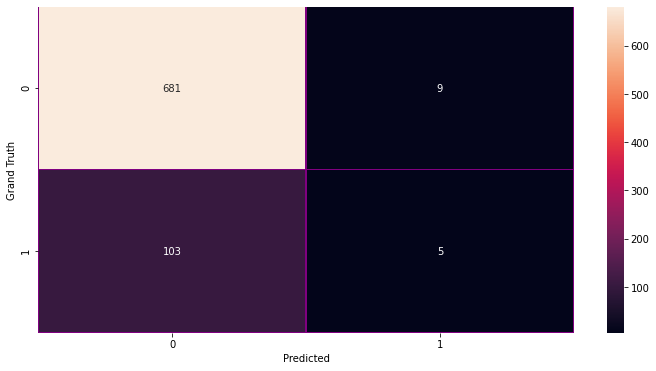

Report 

               precision    recall  f1-score   support

         0.0       0.87      0.99      0.92       690
         1.0       0.36      0.05      0.08       108

    accuracy                           0.86       798
   macro avg       0.61      0.52      0.50       798
weighted avg       0.80      0.86      0.81       798



In [ ]:
cm = confusion_matrix(y_test , y_pred)
f, ax = pyplot.subplots(figsize=(12,6))
sns.heatmap(cm,fmt=".0f", annot=True,linewidths=0.2, linecolor="purple", ax=ax)
pyplot.xlabel("Predicted")
pyplot.ylabel("Grand Truth")
pyplot.show()

print('Report \n\n' , classification_report(y_test,y_pred) )